In [323]:
import pandas as pd
from scipy.spatial.distance import cdist

In [324]:
centroids_2015 = pd.read_csv('data/centroids_2015.csv')
centroids_2019 = pd.read_csv('data/centroids_2019.csv')

In [325]:
distances = cdist(centroids_2015, centroids_2019, metric='euclidean')
distances

array([[1.73875737, 0.7195552 , 4.43116851, 2.9070087 , 2.01156412,
        5.94112056, 3.3579763 ],
       [3.01004405, 1.86257062, 2.61876696, 3.30068195, 0.57485936,
        7.43046041, 4.84828292],
       [5.10550658, 4.27468586, 0.26653273, 4.45645737, 3.00166909,
        8.91906862, 6.50533348],
       [2.41659908, 3.6875304 , 4.54487199, 1.02676699, 3.54467677,
        4.6094475 , 2.42773589],
       [2.70837183, 2.34252743, 3.14992446, 2.10689036, 1.34093689,
        6.59268881, 4.09280835],
       [2.3300425 , 4.0376909 , 6.36736447, 2.45304168, 4.58434036,
        2.66706999, 0.93538757],
       [1.00963031, 2.8358792 , 5.42490676, 1.93133113, 3.3620491 ,
        4.40509649, 1.78337599]])

In [326]:
best_matching = distances.argmin(axis=1)
for i in range(len(best_matching)):
    print(f"Centroid {i} from 2015 matches with centroid {best_matching[i]} from 2019 (distance: {distances[i][best_matching[i]]})")

Centroid 0 from 2015 matches with centroid 1 from 2019 (distance: 0.7195552016402483)
Centroid 1 from 2015 matches with centroid 4 from 2019 (distance: 0.5748593589261694)
Centroid 2 from 2015 matches with centroid 2 from 2019 (distance: 0.2665327296574482)
Centroid 3 from 2015 matches with centroid 3 from 2019 (distance: 1.0267669925167813)
Centroid 4 from 2015 matches with centroid 4 from 2019 (distance: 1.3409368925741345)
Centroid 5 from 2015 matches with centroid 6 from 2019 (distance: 0.9353875707343672)
Centroid 6 from 2015 matches with centroid 0 from 2019 (distance: 1.0096303066356347)


In [327]:
clusters_2015 = pd.read_csv('data/clusters_2015.csv')
clusters_2019 = pd.read_csv('data/clusters_2019.csv')

clusters_combined = pd.merge(clusters_2015, clusters_2019, left_on='country', right_on='country', suffixes=('_2015', '_2019'))
clusters_combined

,country,membership_2015,membership_2019
0,Switzerland,2,2
1,Iceland,2,2
2,Denmark,2,2
3,Norway,2,2
4,Canada,2,2
...,...,...,...
144,Rwanda,3,3
145,Benin,5,6
146,Syria,5,6
147,Burundi,5,6


In [328]:
clusters_2015['membership'] = clusters_2015['membership'].apply(lambda x: best_matching[int(x)])

In [329]:
clusters_matched = clusters_2015.merge(clusters_2019, left_on='country', right_on='country', suffixes=('_2015', '_2019'))
clusters_matched

,country,membership_2015,membership_2019
0,Switzerland,2,2
1,Iceland,2,2
2,Denmark,2,2
3,Norway,2,2
4,Canada,2,2
...,...,...,...
144,Rwanda,3,3
145,Benin,6,6
146,Syria,6,6
147,Burundi,6,6


<Axes: title={'center': 'Cluster Membership 2019'}, xlabel='membership_2019', ylabel='Count'>

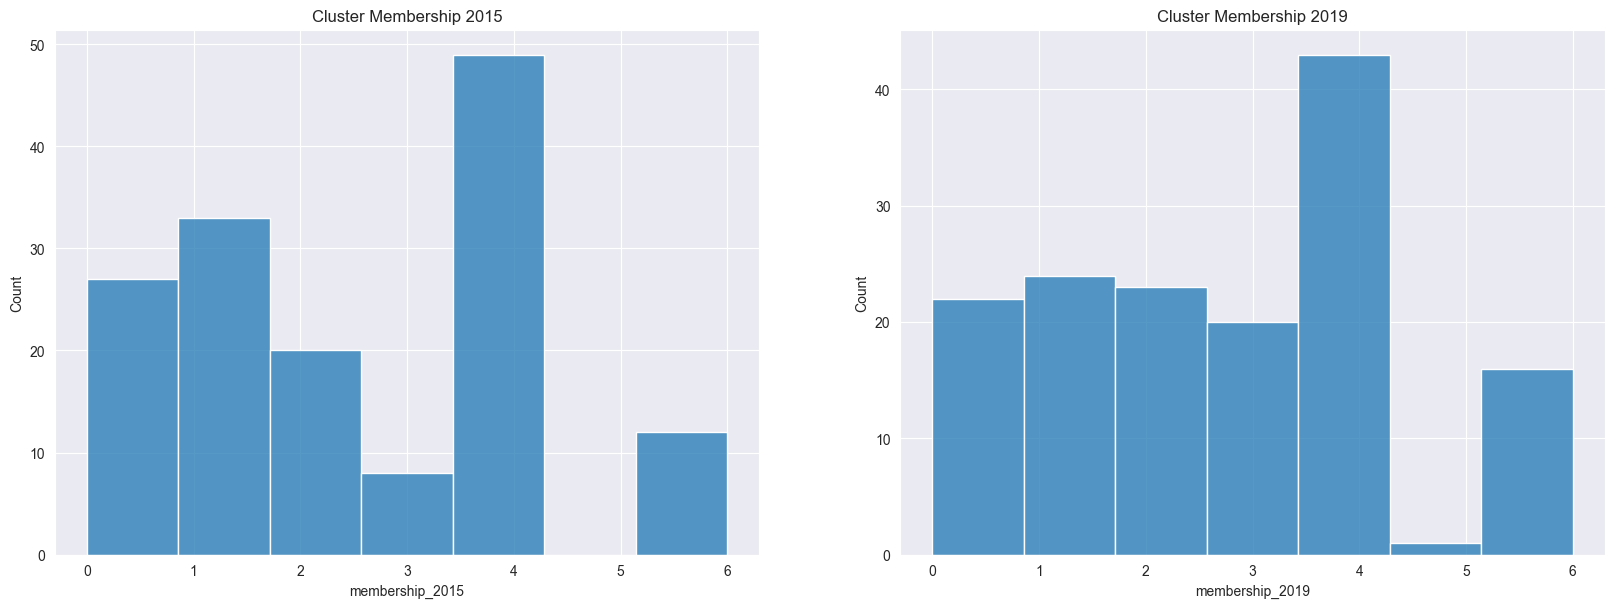

In [330]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('Cluster Membership 2015')
sns.histplot(clusters_matched['membership_2015'], bins=7)

plt.subplot(2, 2, 2)
plt.title('Cluster Membership 2019')
sns.histplot(clusters_matched['membership_2019'], bins=7)


In [331]:
change_count = 0

for i in range(len(clusters_matched)):
    if clusters_matched['membership_2015'][i] != clusters_matched['membership_2019'][i]:
        print(f"{clusters_matched['country'][i]} has different memberships: {clusters_matched['membership_2015'][i]} (2015) vs {clusters_matched['membership_2019'][i]} (2019)")
        
        change_count += 1
        
print(f"\nTotal number of cluster membership changes: {change_count}")

Belgium has different memberships: 4 (2015) vs 2 (2019)
Venezuela has different memberships: 4 (2015) vs 1 (2019)
Malta has different memberships: 4 (2015) vs 2 (2019)
Uzbekistan has different memberships: 4 (2015) vs 2 (2019)
Slovakia has different memberships: 4 (2015) vs 1 (2019)
Peru has different memberships: 1 (2015) vs 4 (2019)
Belarus has different memberships: 4 (2015) vs 1 (2019)
Kosovo has different memberships: 1 (2015) vs 4 (2019)
Indonesia has different memberships: 4 (2015) vs 3 (2019)
Kyrgyzstan has different memberships: 4 (2015) vs 3 (2019)
Bhutan has different memberships: 4 (2015) vs 3 (2019)
Pakistan has different memberships: 6 (2015) vs 0 (2019)
China has different memberships: 1 (2015) vs 4 (2019)
Zambia has different memberships: 0 (2015) vs 3 (2019)
Romania has different memberships: 1 (2015) vs 4 (2019)
Morocco has different memberships: 1 (2015) vs 0 (2019)
Mozambique has different memberships: 0 (2015) vs 3 (2019)
Albania has different memberships: 1 (2015)

In [332]:
centroid_shifts = pd.DataFrame(columns=['cluster', 'total_shift', 'shift_score', 'shift_gdp', 'shift_social_support', 'shift_life_expectancy', 'shift_freedom', 'shift_generosity', 'shift_corruption', 'shift_corruption'])

print(best_matching)

for i in best_matching:
    centroid_2015 = centroids_2015.iloc[i]
    centroid_2019 = centroids_2019.iloc[best_matching[i]]
    
    shift_score = centroid_2015['score'] - centroid_2019['score']
    shift_gdp = centroid_2015['gdp_per_capita'] - centroid_2019['gdp_per_capita']
    shift_social_support = centroid_2015['social_support'] - centroid_2019['social_support']
    shift_life_expectancy = centroid_2015['life_expectancy'] - centroid_2019['life_expectancy']
    shift_freedom = centroid_2015['freedom'] - centroid_2019['freedom']
    shift_generosity = centroid_2015['generosity'] - centroid_2019['generosity']
    shift_corruption = centroid_2015['corruption'] - centroid_2019['corruption']
    
    #euclidean distance
    total_shift = (shift_score**2 + shift_gdp**2 + shift_social_support**2 + shift_life_expectancy**2 + shift_freedom**2 + shift_generosity**2 + shift_corruption**2)**0.5
    
    centroid_shifts.loc[i] = {
        'cluster': i,
        'shift_score': shift_score,
        'shift_gdp': shift_gdp,
        'shift_social_support': shift_social_support,
        'shift_life_expectancy': shift_life_expectancy,
        'shift_freedom': shift_freedom,
        'shift_generosity': shift_generosity,
        'shift_corruption': shift_corruption,
        'total_shift': total_shift
    }
    
centroid_shifts

[1 4 2 3 4 6 0]


,cluster,total_shift,shift_score,shift_gdp,shift_social_support,shift_life_expectancy,shift_freedom,shift_generosity,shift_corruption,shift_corruption
1,1,0.574859,0.235686,0.199571,0.148261,0.073382,-0.172251,-0.137426,0.398953,0.398953
4,4,1.340937,-0.472789,-0.391554,-0.078534,-0.283839,0.184038,1.128056,-0.167791,-0.167791
2,2,0.266533,0.062153,0.091732,0.014567,-0.010830,0.218640,0.055909,-0.086622,-0.086622
3,3,1.026767,-0.120218,-0.304225,-0.476564,0.082410,-0.145397,-0.088984,0.827214,0.827214
6,6,1.009630,-0.257912,-0.609687,0.284635,-0.533236,-0.070197,0.457871,-0.034425,-0.034425
0,0,0.719555,-0.308242,-0.133712,-0.621991,-0.066790,0.091931,-0.053035,-0.047643,-0.047643


In [333]:
prob_2015 = clusters_matched['membership_2015'].value_counts(normalize=True)
prob_2019 = clusters_matched['membership_2019'].value_counts(normalize=True)

print(prob_2015)
print(prob_2019)

membership_2015
4    0.328859
1    0.221477
0    0.181208
2    0.134228
6    0.080537
3    0.053691
Name: proportion, dtype: float64
membership_2019
4    0.288591
1    0.161074
2    0.154362
0    0.147651
3    0.134228
6    0.107383
5    0.006711
Name: proportion, dtype: float64


In [ ]:
labels = [0, 1, 2, 3, 4, 5, 6]
prob_2015 = prob_2015.reindex(labels, fill_value=0)
prob_2019 = prob_2019.reindex(labels, fill_value=0)

epsilon = 1e-10
prob_2015 = prob_2015 + epsilon
prob_2019 = prob_2019 + epsilon

prob_2015 = prob_2015 / prob_2015.sum()
prob_2019 = prob_2019 / prob_2019.sum()

In [ ]:
P = prob_2015.values
Q = prob_2019.values

In [336]:
from scipy.stats import entropy

kl_div_A_from_B = entropy(pk=P, qk=Q)
kl_div_B_from_A = entropy(pk=Q, qk=P)

print(f"KL Divergence D(2015 || 2019): {kl_div_A_from_B:.4f}")
print(f"KL Divergence D(2019 || 2015): {kl_div_B_from_A:.4f}")

KL Divergence D(2015 || 2019): 0.0595
KL Divergence D(2019 || 2015): 0.1772


In [337]:
data_2015 = pd.read_csv("data/2015_processed.csv")
data_2015["year"] = "2015"
data_2015["cluster"] = clusters_2015["membership"].apply(lambda x: best_matching[int(x)])

data_2019 = pd.read_csv("data/2019_processed.csv")
data_2019["year"] = "2019"
data_2019["cluster"] = clusters_2019["membership"]

data_combined = pd.concat([data_2015, data_2019], ignore_index=True)
data_combined

,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,year,cluster
0,Switzerland,7.587,1.365280,1.316097,1.259404,1.572438,0.469547,2.302331,2015,2
1,Iceland,7.561,1.131628,1.509658,1.285347,1.328233,1.570862,-0.016427,2015,2
2,Denmark,7.527,1.189080,1.356740,0.989084,1.465001,0.821680,2.833763,2015,2
3,Norway,7.522,1.520296,1.247954,1.031864,1.600044,0.865884,1.846210,2015,2
4,Canada,7.427,1.191089,1.217334,1.114510,1.356104,1.743021,1.550794,2015,2
...,...,...,...,...,...,...,...,...,...,...
309,Rwanda,3.334,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537,2019,3
310,Tanzania,3.231,-1.077206,-1.082297,-0.934412,0.170490,0.956951,0.385004,2019,3
311,Afghanistan,3.203,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485,2019,6
312,Central African Republic,3.083,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707,2019,5


In [338]:
features = data_combined[['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
features

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,7.587,1.365280,1.316097,1.259404,1.572438,0.469547,2.302331
1,7.561,1.131628,1.509658,1.285347,1.328233,1.570862,-0.016427
2,7.527,1.189080,1.356740,0.989084,1.465001,0.821680,2.833763
3,7.522,1.520296,1.247954,1.031864,1.600044,0.865884,1.846210
4,7.427,1.191089,1.217334,1.114510,1.356104,1.743021,1.550794
...,...,...,...,...,...,...,...
309,3.334,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537
310,3.231,-1.077206,-1.082297,-0.934412,0.170490,0.956951,0.385004
311,3.203,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485
312,3.083,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


In [339]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(features)
principal_components = pca.transform(features)

principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

principal_df

,principal component 1,principal component 2
0,3.971377,1.056232
1,3.384969,0.596545
2,3.892629,1.609358
3,3.811151,1.138498
4,3.562603,1.575264
...,...,...
309,-1.369520,3.112918
310,-2.218630,1.712422
311,-4.514791,-0.443941
312,-5.471052,1.536840


In [340]:
final_df = pd.concat([principal_df, data_combined[['country', 'year', 'cluster']]], axis = 1)
final_df

,principal component 1,principal component 2,country,year,cluster
0,3.971377,1.056232,Switzerland,2015,2
1,3.384969,0.596545,Iceland,2015,2
2,3.892629,1.609358,Denmark,2015,2
3,3.811151,1.138498,Norway,2015,2
4,3.562603,1.575264,Canada,2015,2
...,...,...,...,...,...
309,-1.369520,3.112918,Rwanda,2019,3
310,-2.218630,1.712422,Tanzania,2019,3
311,-4.514791,-0.443941,Afghanistan,2019,6
312,-5.471052,1.536840,Central African Republic,2019,5


In [341]:
targets = final_df['cluster'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

def label_points(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']), size=7)


def scatter_plot(df, year):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(f"{year}", fontsize=20)
    
    for target, color in zip(targets, colors):
        indicesToKeep = df['cluster'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 20)
        
    label_points(df['principal component 1'], df['principal component 2'], df['country'], ax)
                
    ax.legend(targets)
    ax.grid()

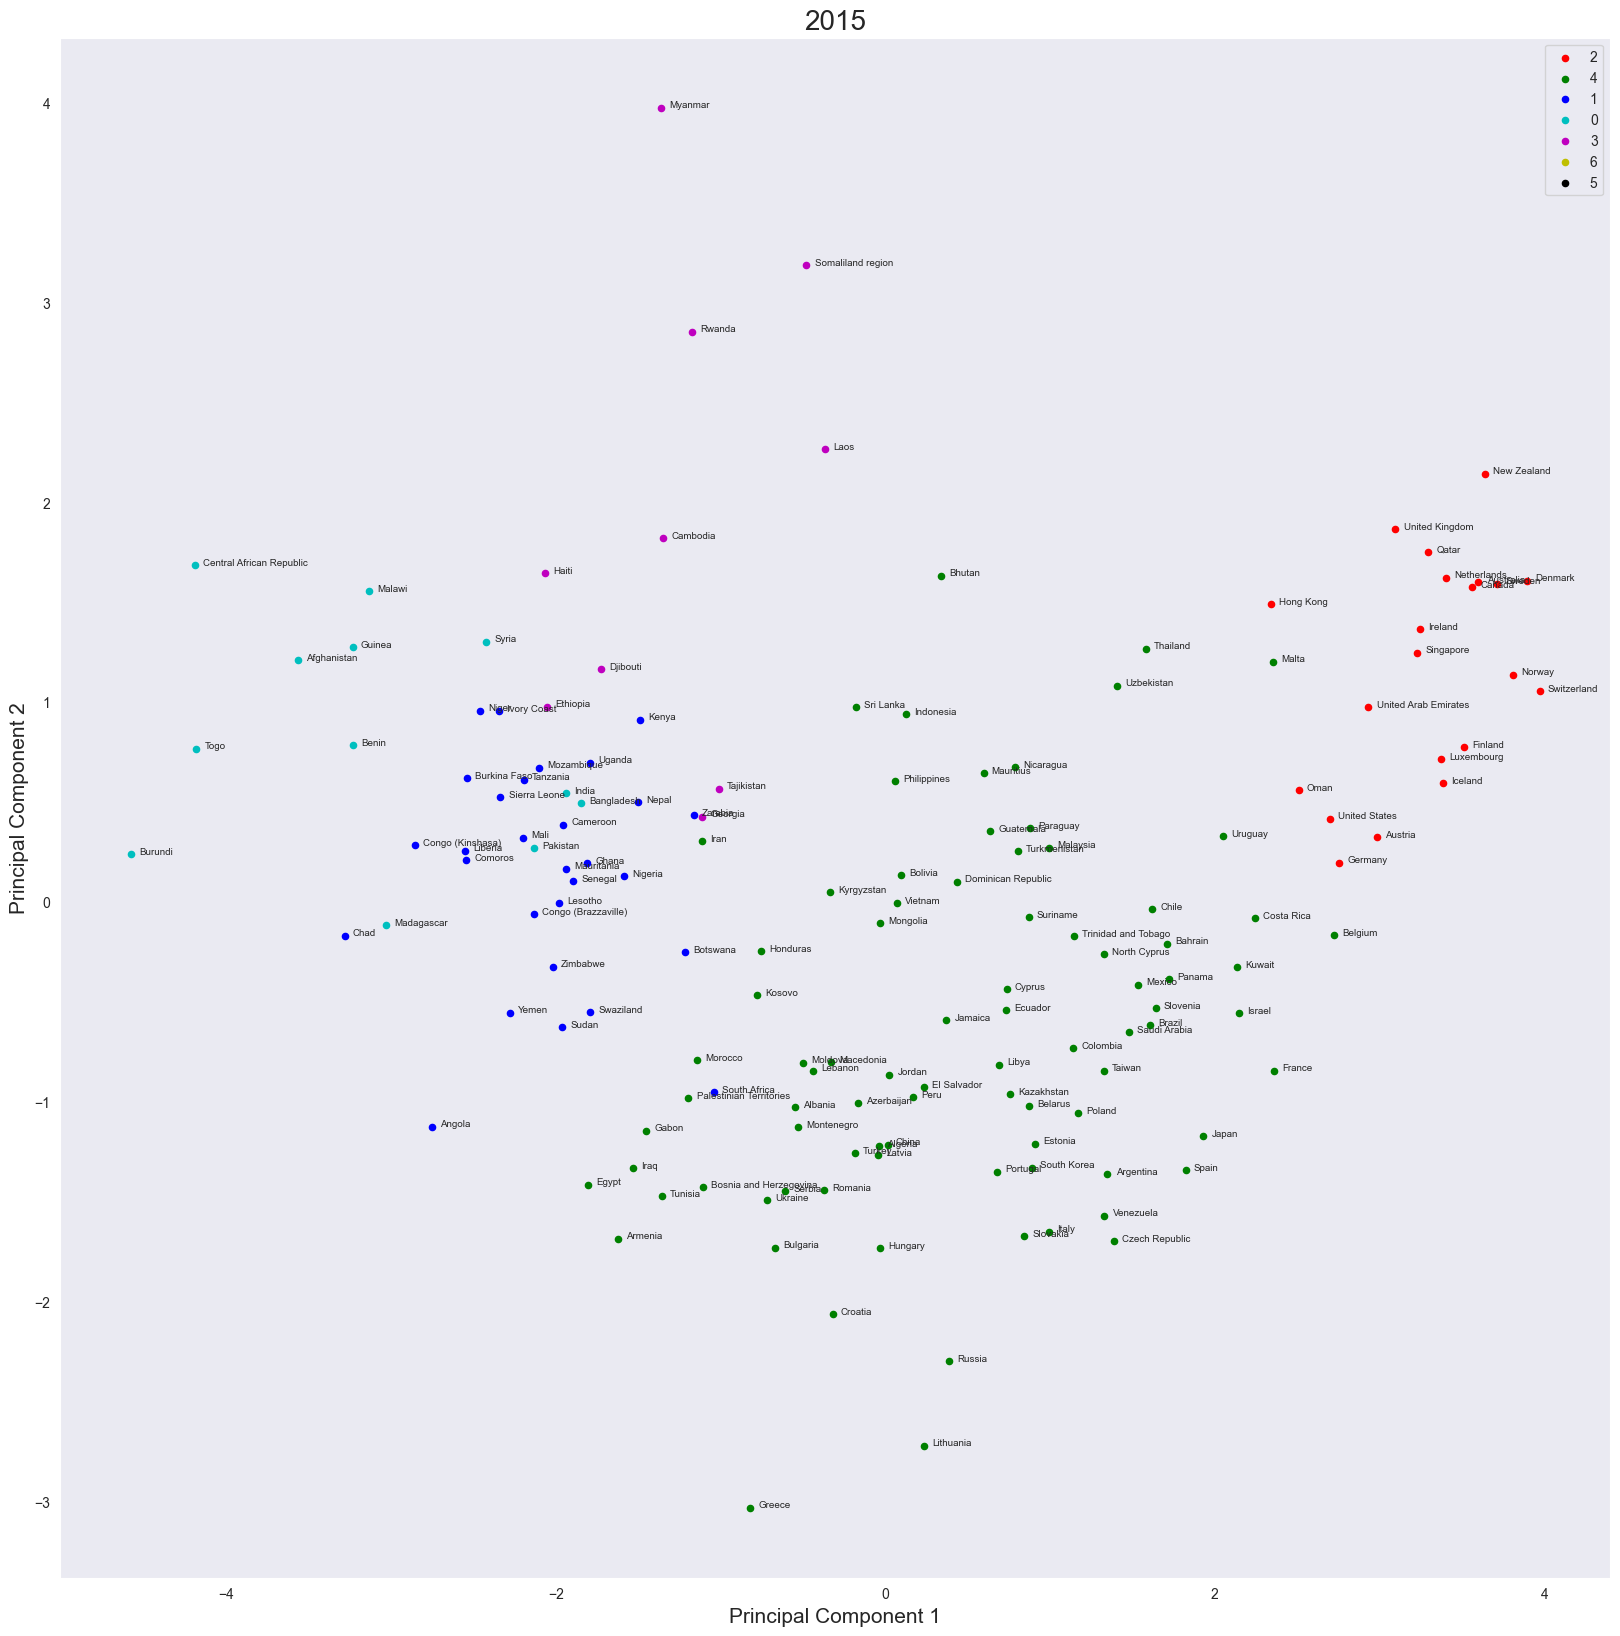

In [342]:
scatter_plot(final_df[final_df['year'] == '2015'], 2015)

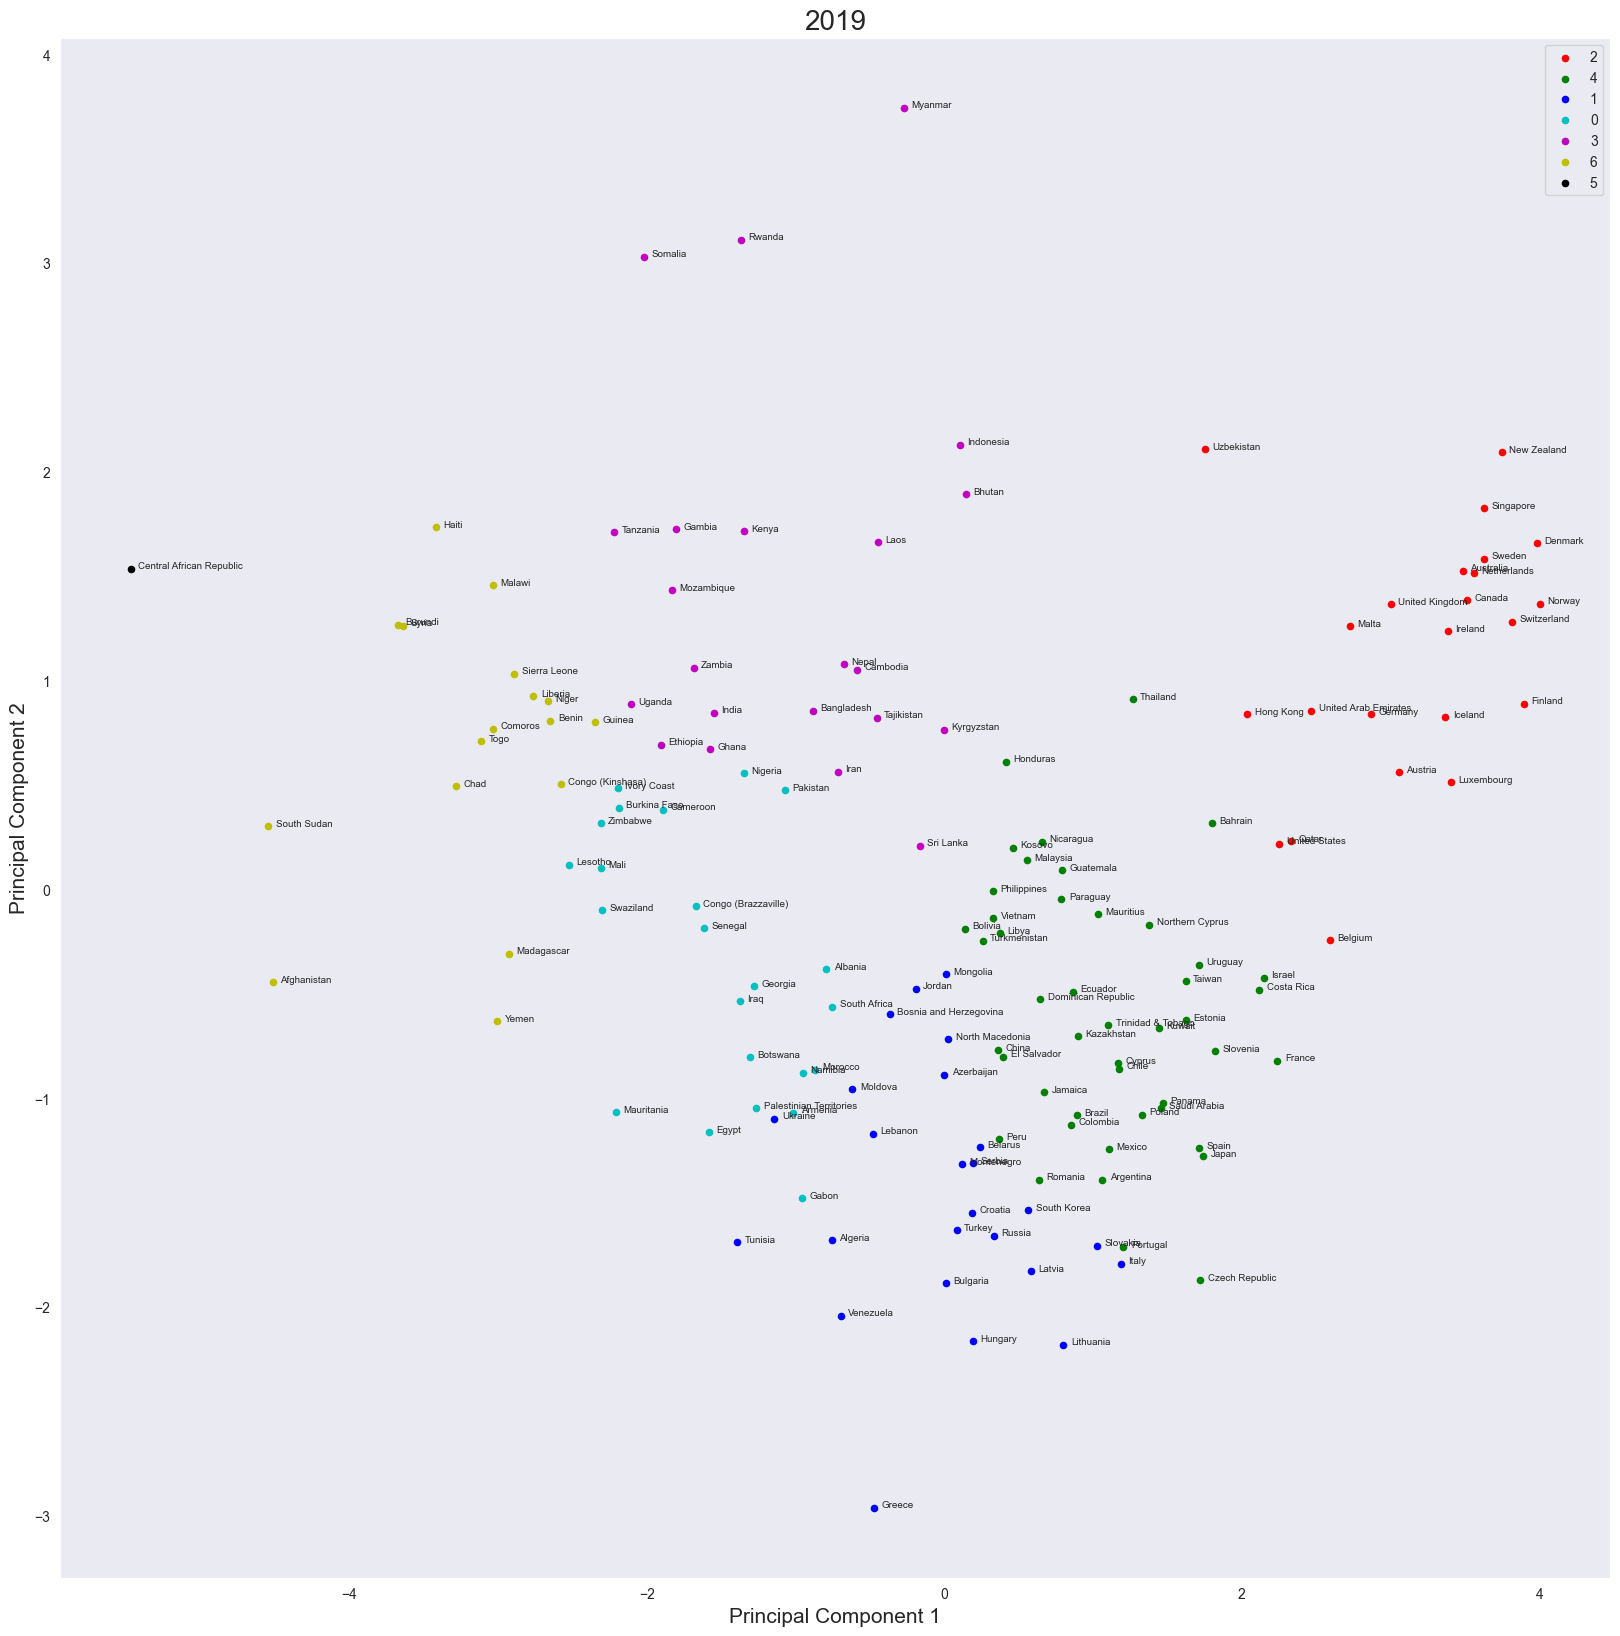

In [343]:
scatter_plot(final_df[final_df['year'] == '2019'], 2019)

In [344]:
centroids = pd.DataFrame(columns=['cluster', 'year', 'score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption'])

for i in range(len(centroids_2015)):
    centroid_2015 = centroids_2015.iloc[i]
    cluster = best_matching[i]
    
    centroids.loc[-1] = [cluster, 2015, centroid_2015['score'], centroid_2015['gdp_per_capita'], centroid_2015['social_support'], centroid_2015['life_expectancy'], centroid_2015['freedom'], centroid_2015['generosity'], centroid_2015['corruption']]
    centroids.index = centroids.index + 1
    centroids = centroids.sort_index()
    
for i in range(len(centroids_2019)):
    centroid_2019 = centroids_2019.iloc[i]
    cluster = i
    
    centroids.loc[-1] = [cluster, 2019, centroid_2019['score'], centroid_2019['gdp_per_capita'], centroid_2019['social_support'], centroid_2019['life_expectancy'], centroid_2019['freedom'], centroid_2019['generosity'], centroid_2019['corruption']]
    centroids.index = centroids.index + 1
    centroids = centroids.sort_index()

centroids

,cluster,year,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,6.0,2019.0,3.931353,-1.586757,-1.628476,-1.361515,-1.278653,0.343115,-0.301307
1,5.0,2019.0,3.083000,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707
2,4.0,2019.0,6.049689,0.459593,0.547206,0.549034,0.547815,-0.370721,-0.350269
3,3.0,2019.0,4.520818,-0.861337,-0.599329,-0.607570,0.468996,0.996081,0.138830
4,2.0,2019.0,7.023609,1.229800,0.956241,1.095450,1.083813,0.945084,1.804265
5,1.0,2019.0,5.394360,0.390102,0.437800,0.444551,-1.051093,-0.702184,-0.608461
6,0.0,2019.0,4.586739,-0.460374,-0.550139,-0.953985,-0.465801,-0.685789,-0.332905
7,0.0,2015.0,4.328828,-1.070062,-0.265503,-1.487222,-0.535999,-0.227918,-0.367331
8,6.0,2015.0,3.785417,-1.353006,-2.274524,-1.038419,-0.757263,0.275772,-0.330630
9,4.0,2015.0,5.576900,0.068039,0.468671,0.265194,0.731854,0.757335,-0.518060


In [345]:
centroid_features = centroids[['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]

principal_components_centroids = pca.transform(centroid_features)
principal_df_centroids = pd.DataFrame(data = principal_components_centroids,
                columns = ['principal component 1', 'principal component 2'])
principal_df_centroids['year'] = centroids['year']
principal_df_centroids['cluster'] = centroids['cluster']
principal_df_centroids

,principal component 1,principal component 2,year,cluster
0,-3.181388,0.682500,2019.0,6.0
1,-5.471052,1.536840,2019.0,5.0
2,1.068651,-0.587926,2019.0,4.0
3,-1.062639,1.440353,2019.0,3.0
4,3.152429,1.120410,2019.0,2.0
5,-0.022756,-1.458146,2019.0,1.0
6,-1.556008,-0.340547,2019.0,0.0
7,-2.059820,0.150047,2015.0,0.0
8,-3.124746,0.834983,2015.0,6.0
9,0.613756,0.370155,2015.0,4.0


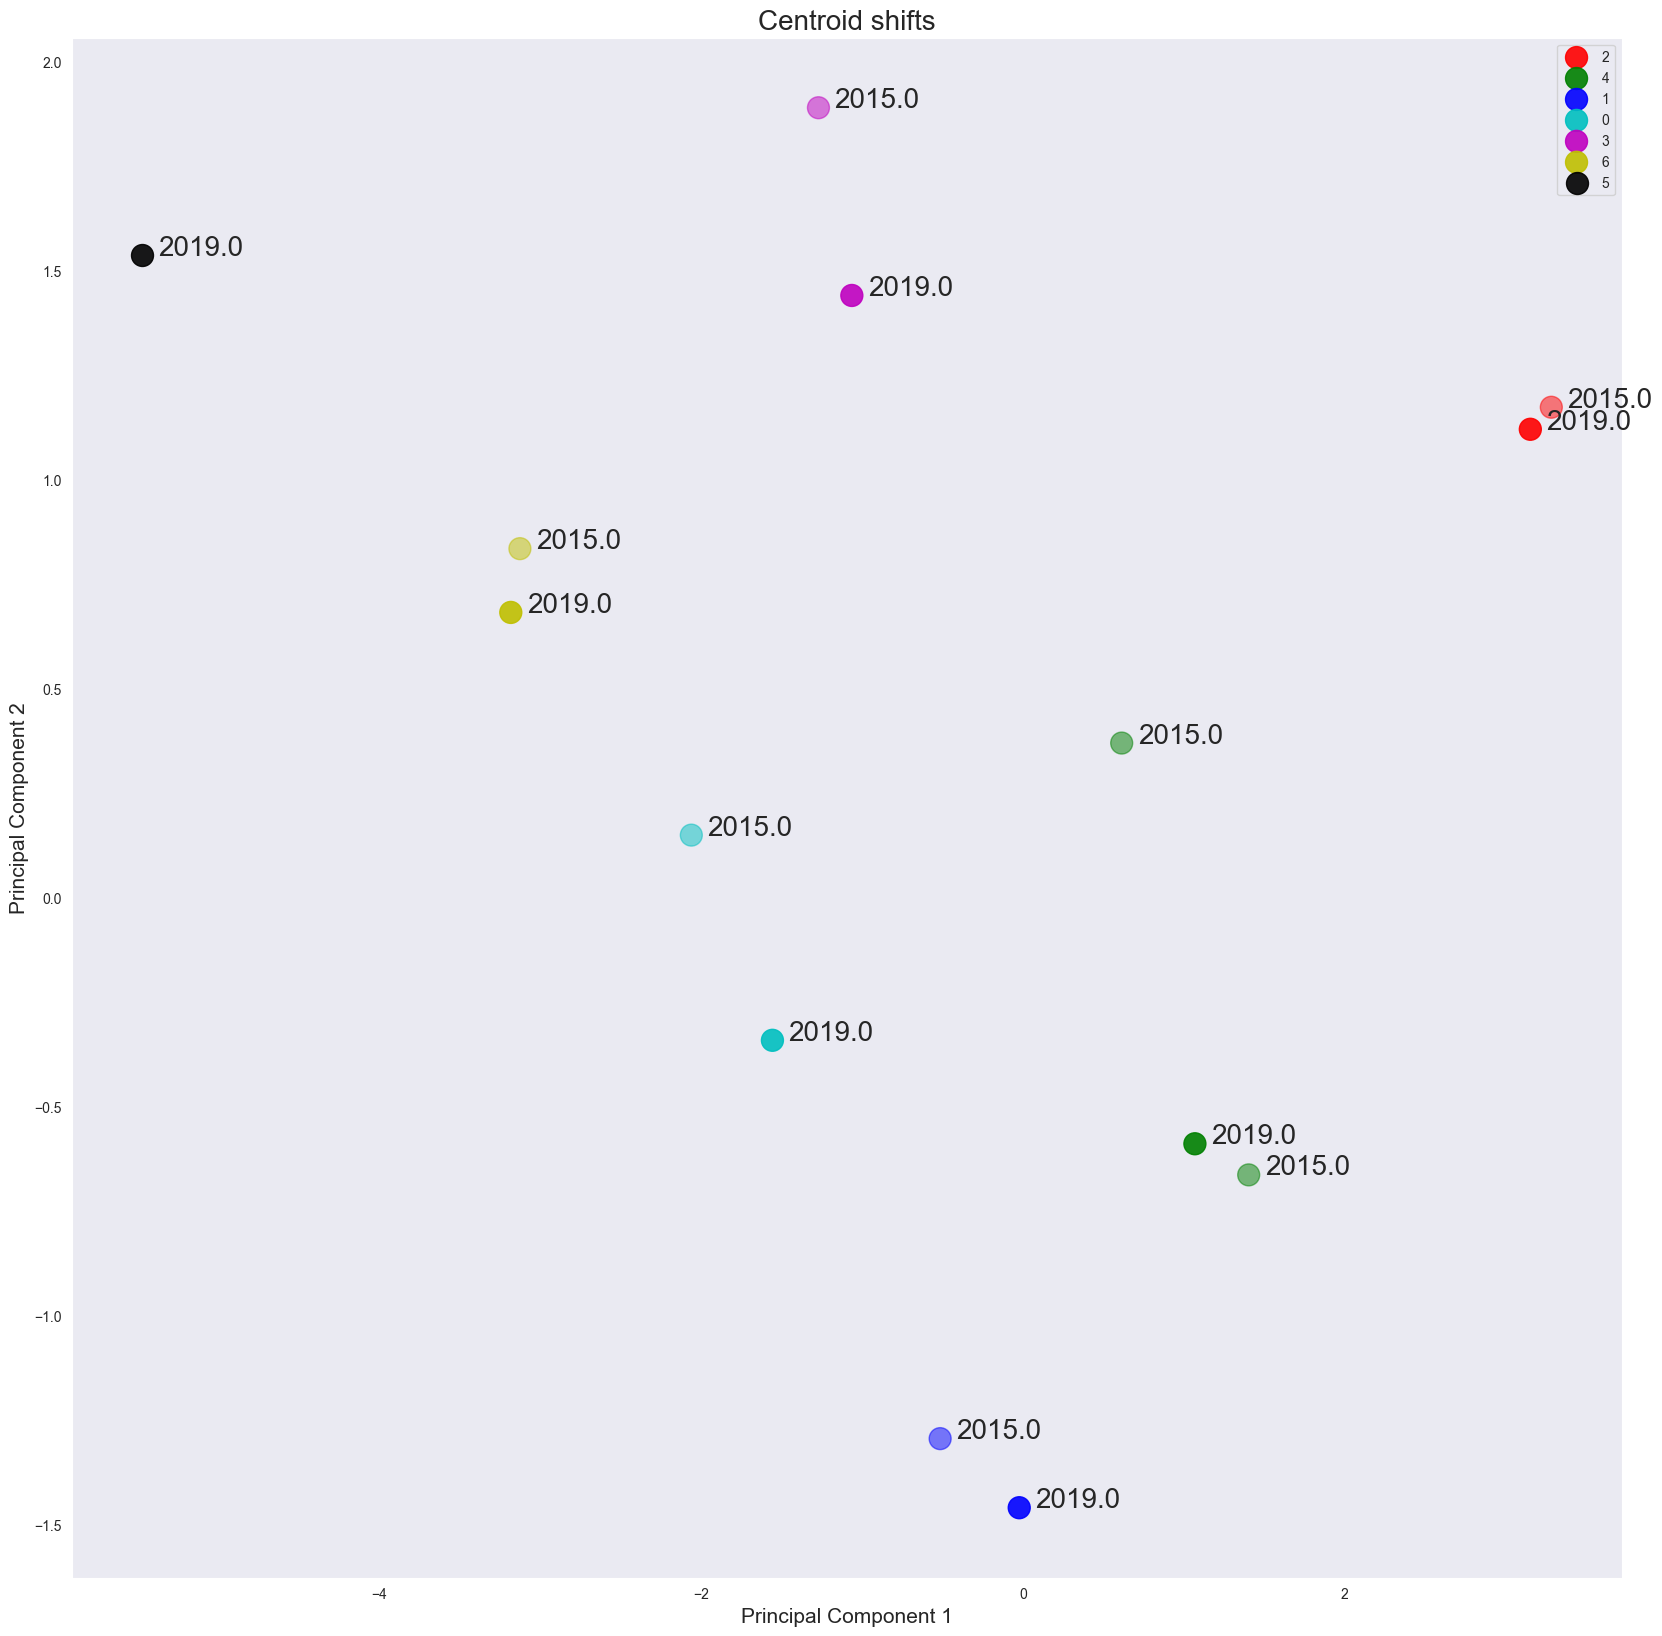

In [346]:
def label_points_centroids(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.1, point['y'], str(point['val']), size=20)

def scatter_plot_centroids(df, year):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(f"Centroid shifts", fontsize=20)

    for target, color in zip(targets, colors):
        indicesToKeep = df['cluster'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c=color
                   , s=250
                   , alpha=(df.loc[indicesToKeep, 'year'] - 2010) / 10)

    label_points_centroids(df['principal component 1'], df['principal component 2'], df['year'], ax)

    ax.legend(targets)
    ax.grid()
    
scatter_plot_centroids(principal_df_centroids, 2015)

In [347]:
changes_df = pd.DataFrame(data_2015["country"])

changes_df["score"] = data_2019["score"] -  data_2015["score"]
changes_df["gdp_per_capita"] = data_2019["gdp_per_capita"] -  data_2015["gdp_per_capita"]
changes_df["social_support"] = data_2019["social_support"] -  data_2015["social_support"]
changes_df["life_expectancy"] = data_2019["life_expectancy"] -  data_2015["life_expectancy"]
changes_df["freedom"] = data_2019["freedom"] -  data_2015["freedom"]
changes_df["generosity"] = data_2019["generosity"] -  data_2015["generosity"]
changes_df["corruption"] = data_2019["corruption"] -  data_2015["corruption"]

changes_df

,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,Switzerland,0.182,-0.273754,-0.052070,-0.182450,-0.152728,-0.803874,0.684806
1,Iceland,0.039,0.067833,-0.292424,-0.167092,0.063562,-0.865867,3.183386
2,Denmark,0.027,0.273942,-0.109425,0.261335,0.003561,0.082780,-0.396671
3,Norway,-0.028,-0.328365,0.139739,0.210295,-0.215228,0.909926,-1.767962
4,Canada,0.061,0.041003,-0.170559,0.016136,-0.208570,-0.303153,0.431454
...,...,...,...,...,...,...,...,...
153,Rwanda,-0.262,0.154586,-1.514296,-0.688352,-3.823995,-0.194884,-4.308586
154,Benin,-0.257,-0.818864,-1.700849,-1.302319,-1.540309,0.958269,-0.272175
155,Syria,-0.153,-1.050121,-0.223363,-2.147975,-0.866410,-1.670921,-0.587562
156,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
pca = PCA(n_components=2)
changes_principal_components = pca.fit_transform(changes_df.drop(columns=["country"]).dropna())

changes_principal_df = pd.DataFrame(data=changes_principal_components
                            , columns=['principal component 1', 'principal component 2'])

changes_principal_df = pd.concat([changes_principal_df, changes_df[['country']]], axis = 1)

changes_principal_df = pd.merge(changes_principal_df, clusters_2019, left_on='country', right_on='country', suffixes=('', '_y'))
changes_principal_df = changes_principal_df.rename(columns={"membership": "cluster"})
changes_principal_df

,principal component 1,principal component 2,country,cluster
0,-0.199868,-0.035673,Switzerland,2
1,1.066704,0.608935,Iceland,2
2,-0.171010,0.237429,Denmark,2
3,-0.391111,-0.468651,Norway,2
4,-0.096053,0.102851,Canada,2
...,...,...,...,...
144,-4.516695,-2.287540,Rwanda,3
145,-0.313495,-2.371569,Benin,6
146,-1.613876,-2.034667,Syria,6
147,NaN,NaN,Burundi,6


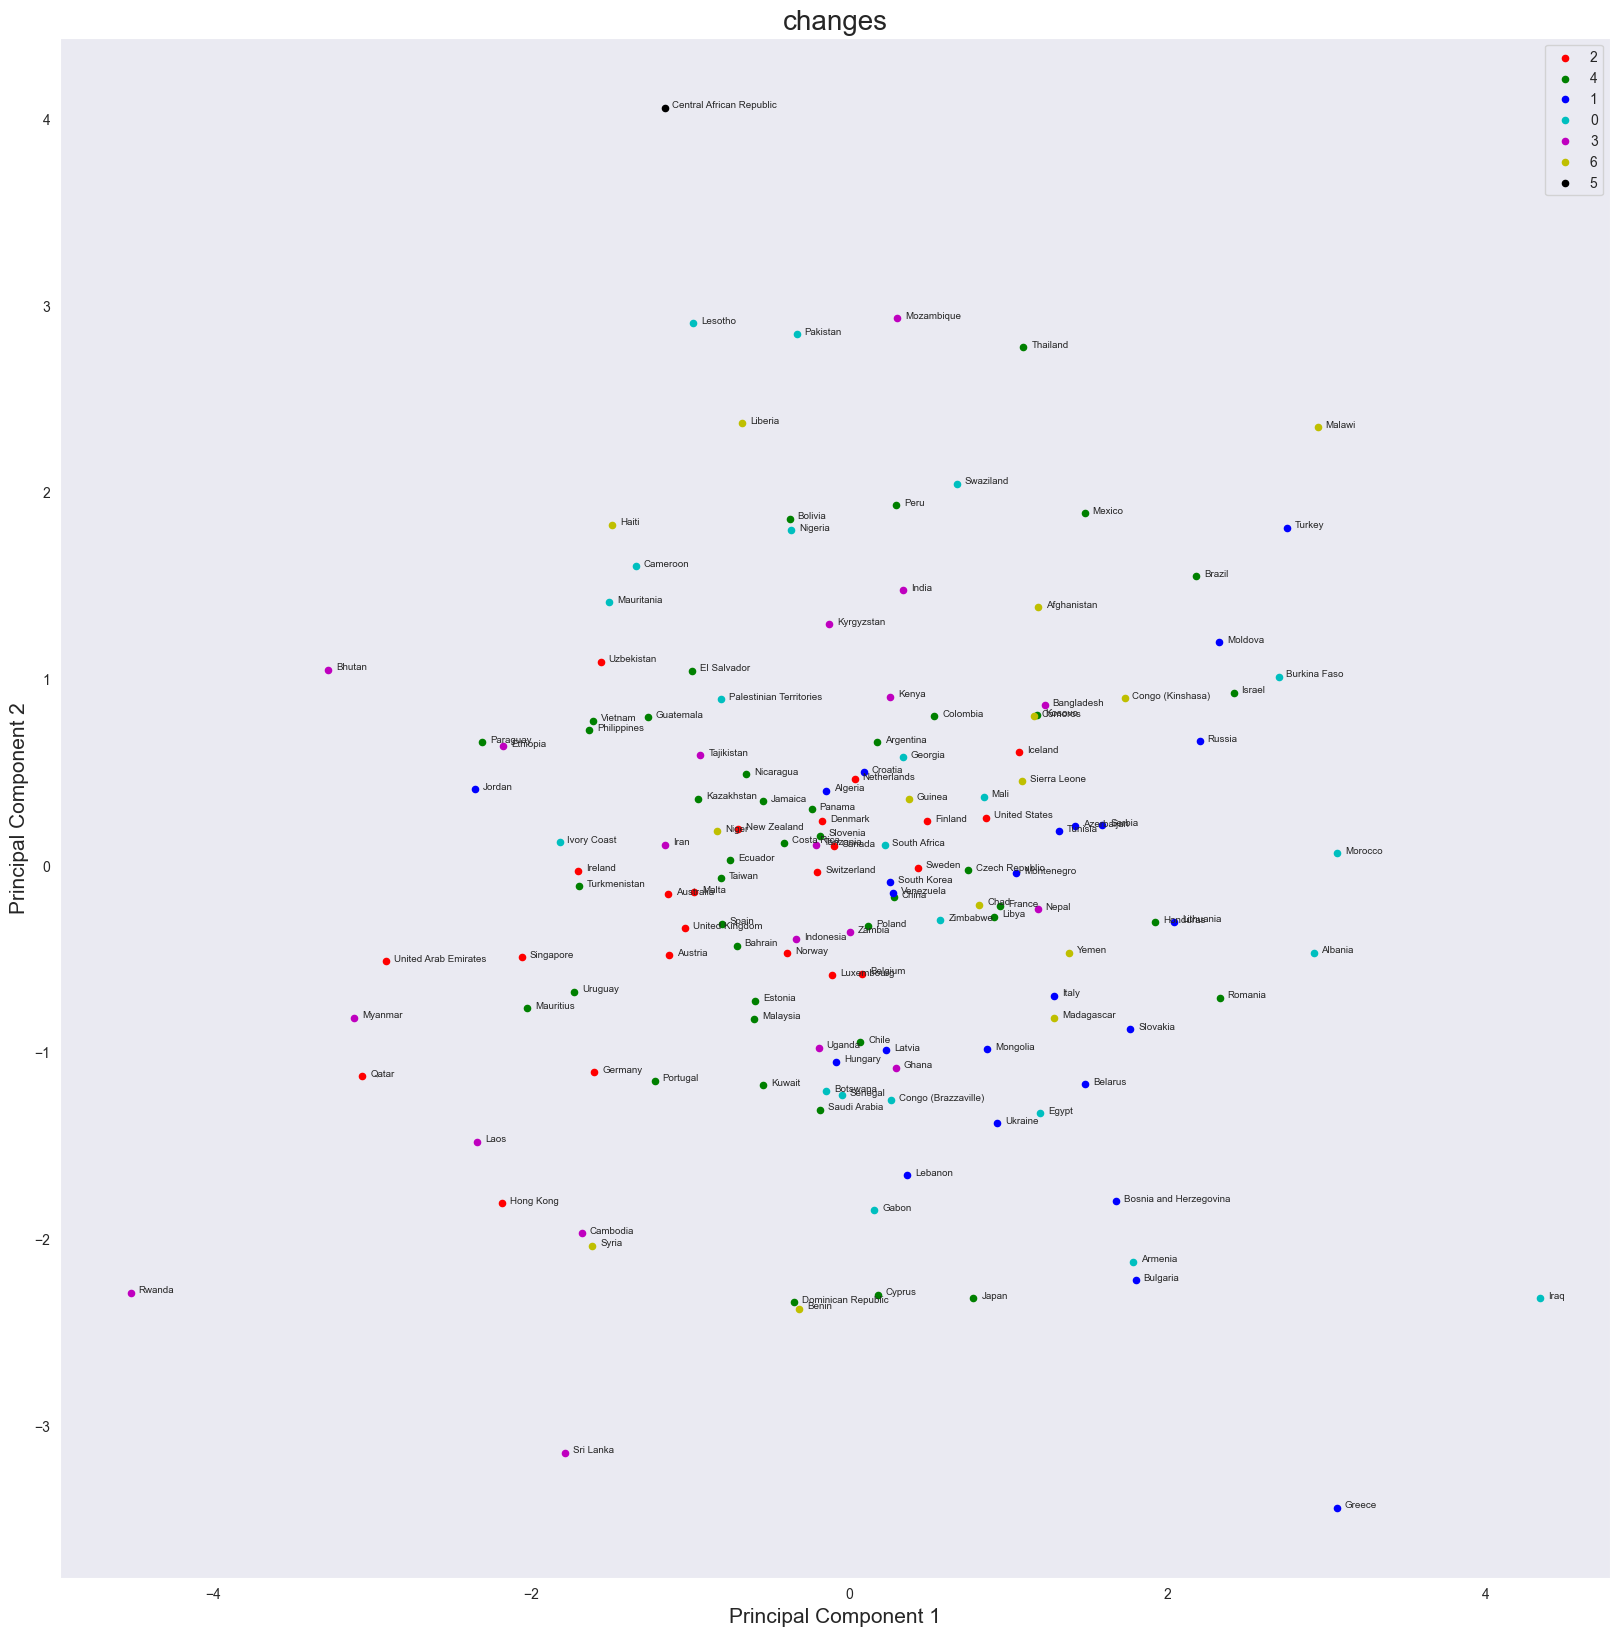

In [349]:
scatter_plot(changes_principal_df, "changes")